In [ ]:
%pip install Biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 47.4 MB/s eta 0:00:00


In [ ]:
from Bio import SeqIO
import pandas as pd

In [12]:
amp_s2 = "/content/AMP_S2.fa"

In [13]:
data = []
for record in SeqIO.parse(amp_s2, "fasta"):
        data.append({
            "ID": record.id,
            "Description": record.description,
            "Sequence": str(record.seq)
        })
df_train = pd.DataFrame(data)
display(df_train.head())

,ID,Description,Sequence
0,antimicrobial,antimicrobial (length=17),AAAAKKSPKKPKKPAAA
1,antimicrobial,antimicrobial (length=19),AAAAKKSPKKPKKPAAAKK
2,antimicrobial,antimicrobial (length=21),AAAKAKKPVAKKAAGGVKKPK
3,Antiviral,Antiviral (length=97),AACARFIDDFCDTLTPNIYRPRDNGQRCYAVNGHRCDFTVFNTNNG...
4,anti-Gram+;antibacterial;antimicrobial;Gram-,anti-Gram+;antibacterial;antimicrobial;Gram- (...,AACSDRAHGHICESFKSFCKDSGRNGVKLRANCKKTCGLC


In [14]:
df_antifungal = df_train[
    df_train["ID"].str.contains("antifungal", case=False, na=False) |
    df_train["Description"].str.contains("antifungal", case=False, na=False)
]

display(df_antifungal.head())

,ID,Description,Sequence
28,anti-Gram+;antibacterial;antifungal;antimicrob...,anti-Gram+;antibacterial;antifungal;antimicrob...,AAGMGFFGARA
35,anti-Gram-;antibacterial;antifungal;antimicrobial,anti-Gram-;antibacterial;antifungal;antimicrob...,AAKIILNPKFRCKAAFC
38,Antifungal,Antifungal (length=255),AAKMAKNVDKPLFTATFNVQASSADYATFIAGIRNKLRNPAHFSHN...
39,Antifungal,Antifungal (length=255),AAKMAKNVDKPLFTATFNVQASSADYATFIAGIRNKLRNPAHFSHN...
46,Antibacterial;Antifungal;antimicrobial;Gram-,Antibacterial;Antifungal;antimicrobial;Gram- (...,AALKGCWTKSIPPKPCFGKR


In [15]:
display(df_antifungal)

,ID,Description,Sequence
28,anti-Gram+;antibacterial;antifungal;antimicrob...,anti-Gram+;antibacterial;antifungal;antimicrob...,AAGMGFFGARA
35,anti-Gram-;antibacterial;antifungal;antimicrobial,anti-Gram-;antibacterial;antifungal;antimicrob...,AAKIILNPKFRCKAAFC
38,Antifungal,Antifungal (length=255),AAKMAKNVDKPLFTATFNVQASSADYATFIAGIRNKLRNPAHFSHN...
39,Antifungal,Antifungal (length=255),AAKMAKNVDKPLFTATFNVQASSADYATFIAGIRNKLRNPAHFSHN...
46,Antibacterial;Antifungal;antimicrobial;Gram-,Antibacterial;Antifungal;antimicrobial;Gram- (...,AALKGCWTKSIPPKPCFGKR
...,...,...,...
11609,antibacterial;antifungal;antimicrobial,antibacterial;antifungal;antimicrobial (length...,YSRCQLQGFNCVVRSYGLPTIPCCRGLTCRSYFPGSTYGRCQRFY
11610,Antibacterial;Antifungal,Antibacterial;Antifungal (length=40),YSRCQLQGFNCVVRSYGLPTIPCCRGSYFPGSTYGRCQRP
11615,antibacterial;antifungal;antimicrobial,antibacterial;antifungal;antimicrobial (length...,YSWPRLPRIPRLPRYPRYPRWPRHPTIYA
11616,antibacterial;antifungal;antimicrobial,antibacterial;antifungal;antimicrobial (length...,YSWPRLPRIPRLPRYPRYPRYPRWPRHPTIYA


In [16]:
df_antifungal = df_antifungal.drop(columns=["ID", "Description"])

df_antifungal["label"] = 1

display(df_antifungal)

,Sequence,label
28,AAGMGFFGARA,1
35,AAKIILNPKFRCKAAFC,1
38,AAKMAKNVDKPLFTATFNVQASSADYATFIAGIRNKLRNPAHFSHN...,1
39,AAKMAKNVDKPLFTATFNVQASSADYATFIAGIRNKLRNPAHFSHN...,1
46,AALKGCWTKSIPPKPCFGKR,1
...,...,...
11609,YSRCQLQGFNCVVRSYGLPTIPCCRGLTCRSYFPGSTYGRCQRFY,1
11610,YSRCQLQGFNCVVRSYGLPTIPCCRGSYFPGSTYGRCQRP,1
11615,YSWPRLPRIPRLPRYPRYPRWPRHPTIYA,1
11616,YSWPRLPRIPRLPRYPRYPRYPRWPRHPTIYA,1


### Verificar duplicados

In [25]:
df_antifungal = df_antifungal

# 1. Crear el DataFrame que solo contiene las filas con secuencias duplicadas
filas_con_secuencias_duplicadas = df_antifungal[
    df_antifungal.duplicated(subset=['Sequence'], keep=False)
].sort_values(by='Sequence') # Ordenamos para que las secuencias repetidas aparezcan juntas

# 2. Imprimir los resultados
if len(filas_con_secuencias_duplicadas) > 0:
    print(f"Se encontraron {len(filas_con_secuencias_duplicadas)} filas con secuencias duplicadas (incluyendo la primera aparición).")
    print("A continuación se muestran las filas duplicadas:")

    # Mostramos las columnas relevantes para la secuencia y actividad
    print(filas_con_secuencias_duplicadas[['Sequence', 'label']].head(20))
else:
    print("¡No se encontraron secuencias duplicadas en tu DataFrame!")

Se encontraron 6 filas con secuencias duplicadas (incluyendo la primera aparición).
A continuación se muestran las filas duplicadas:
                                       Sequence  label
4872                                HEKHHSHRGYR      1
4873                                HEKHHSHRGYR      1
9868                        PDPAKTAPKKGSKKAVTKA      1
9869                        PDPAKTAPKKGSKKAVTKA      1
743    SDKPDVKEVESFDKSKLKKVETQEKNPLPTKETIEQEKKG      1
10572  SDKPDVKEVESFDKSKLKKVETQEKNPLPTKETIEQEKKG      1


### Verificación de secuencias canónicas

In [21]:
df_sin_duplicados = df_antifungal.drop_duplicates(subset=['Sequence'], keep='first')
df_sin_duplicados.shape

(1745, 2)

In [22]:
df_sin_duplicados = df_sin_duplicados.copy()
df_sin_duplicados["Sequence"] = df_sin_duplicados["Sequence"].str.strip() #eliminamos los posibles espacios en la secuencia

In [23]:
valid_mask = df_sin_duplicados["Sequence"].str.fullmatch(r"[ACDEFGHIKLMNPQRSTVWY]+", na=False)
invalid_df = df_sin_duplicados[~valid_mask].copy()
invalid_df

,Sequence,label


In [24]:
# Mantener solo secuencias canónicas
filtered = df_sin_duplicados[valid_mask].copy()
filtered.shape

(1745, 2)

In [28]:
df_antifungal = filtered
df_antifungal.shape

(1745, 2)

### Evaluación de longitud

In [30]:
df_antifungal = df_antifungal.copy()  # opcional pero limpio
df_antifungal["Largo"] = df_antifungal["Sequence"].str.len()
df_antifungal["Largo"].describe()

,Largo
count,1745.000000
mean,35.216619
std,32.017950
min,11.000000
25%,20.000000
50%,27.000000
75%,40.000000
max,255.000000


<Axes: xlabel='Largo', ylabel='Count'>

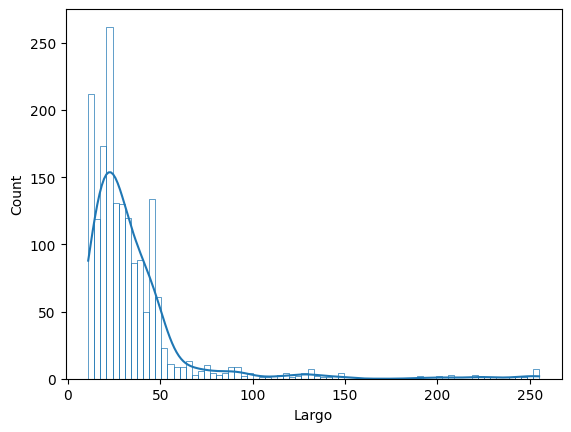

In [32]:
import seaborn as sns
sns.histplot(data=df_antifungal, x="Largo", fill=False, kde=True)


In [33]:
df_largo = df_antifungal[df_antifungal["Largo"] > 100]
df_largo

,Sequence,label,Largo
38,AAKMAKNVDKPLFTATFNVQASSADYATFIAGIRNKLRNPAHFSHN...,1,255
39,AAKMAKNVDKPLFTATFNVQASSADYATFIAGIRNKLRNPAHFSHN...,1,255
73,AAVFTVVNQCPFTVWAASVPVGGGRQLNRGESWRITAPAGTTAARI...,1,207
130,ADNFSLHDALSGSGNPNPQGWPGAWGNQPAGAGGYPGASYPGAYPG...,1,249
139,AEETSFVFSKFKPLEPNLILQGDALVTVAGVLQLTNVDKNGVPEPS...,1,249
140,AEETSFVFSKFKPLEPNLILQGDALVTVAGVLQLTNVDSNGVPEPS...,1,239
242,AIQDFCVADYSAPQGPAGYSCKNPAKVTVDNFVYSGLGITGNTTNL...,1,191
281,AKITFTNNCPRTIWPGTLTSDQKPQLPNTGFVLASKASLTLGVQAP...,1,221
404,ANTAFVSSACNTQKIPSGSPFNRNLRAMLADLRQNTAFSGYDYKTS...,1,108
445,AQITLTNKCSYTVWPGSQANANSAQLSTTGFELPTGQSKTVDVPAP...,1,220


In [34]:
df_antifungal = df_antifungal.drop('Largo', axis=1)
display(df_antifungal)

,Sequence,label
28,AAGMGFFGARA,1
35,AAKIILNPKFRCKAAFC,1
38,AAKMAKNVDKPLFTATFNVQASSADYATFIAGIRNKLRNPAHFSHN...,1
39,AAKMAKNVDKPLFTATFNVQASSADYATFIAGIRNKLRNPAHFSHN...,1
46,AALKGCWTKSIPPKPCFGKR,1
...,...,...
11609,YSRCQLQGFNCVVRSYGLPTIPCCRGLTCRSYFPGSTYGRCQRFY,1
11610,YSRCQLQGFNCVVRSYGLPTIPCCRGSYFPGSTYGRCQRP,1
11615,YSWPRLPRIPRLPRYPRYPRWPRHPTIYA,1
11616,YSWPRLPRIPRLPRYPRYPRYPRWPRHPTIYA,1


In [38]:
from google.colab import files

dataframe_a_descargar = df_antifungal
dataframe_a_descargar.to_csv(
    'Ensemble-AMPPred.csv',
    index=False
)
files.download('Ensemble-AMPPred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>